<a href="https://colab.research.google.com/github/ramsoi53/ramsoi/blob/main/ML_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/files')

In [2]:
!pwd

/content/drive/MyDrive/Colab Notebooks/files


# Project Practice - Kaggle's Titanic competition
Detailed Time Schedule

*   Import files and check files - 2022.04.04 
*   Check nulls and deal with them - 2022.04.04
*   Data Preprocessing
    - Set up the logic
    - Visulaization
    - Check Outliners and deal with it  - 2022.04.04








In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Import and read files

train = pd.read_csv('ttn_train.csv')
test = pd.read_csv('tn_test.csv')
display(train.head(), test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# shape of each data

print('train data:', train.shape, 'test data:', test.shape)

train data: (891, 12) test data: (418, 11)


In [6]:
# info of each data
print('train data:', train.info(), 'test data:', test.info())
print()
train.isnull().sum()
print()
test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#Findings from above


1.   There are null vales in Age & Cabin categories.
2.   Dtypes of 5 categories are object which needs to be converted to either int or float



In [7]:
# Let's see how each data looks like
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA through visualization

In [9]:
# make a copy of origianal data
df_train = train.copy()
df_test = test.copy()


In [10]:
# drop names cause I don't think it is helpful for ML. 

df_train.drop(columns=['Name'], inplace=True)
df_test.drop(columns=['Name'], inplace=True)

In [11]:
# Set PassengerId as index
df_train.set_index('PassengerId', inplace=True)


In [12]:
df_test.set_index('PassengerId', inplace=True)

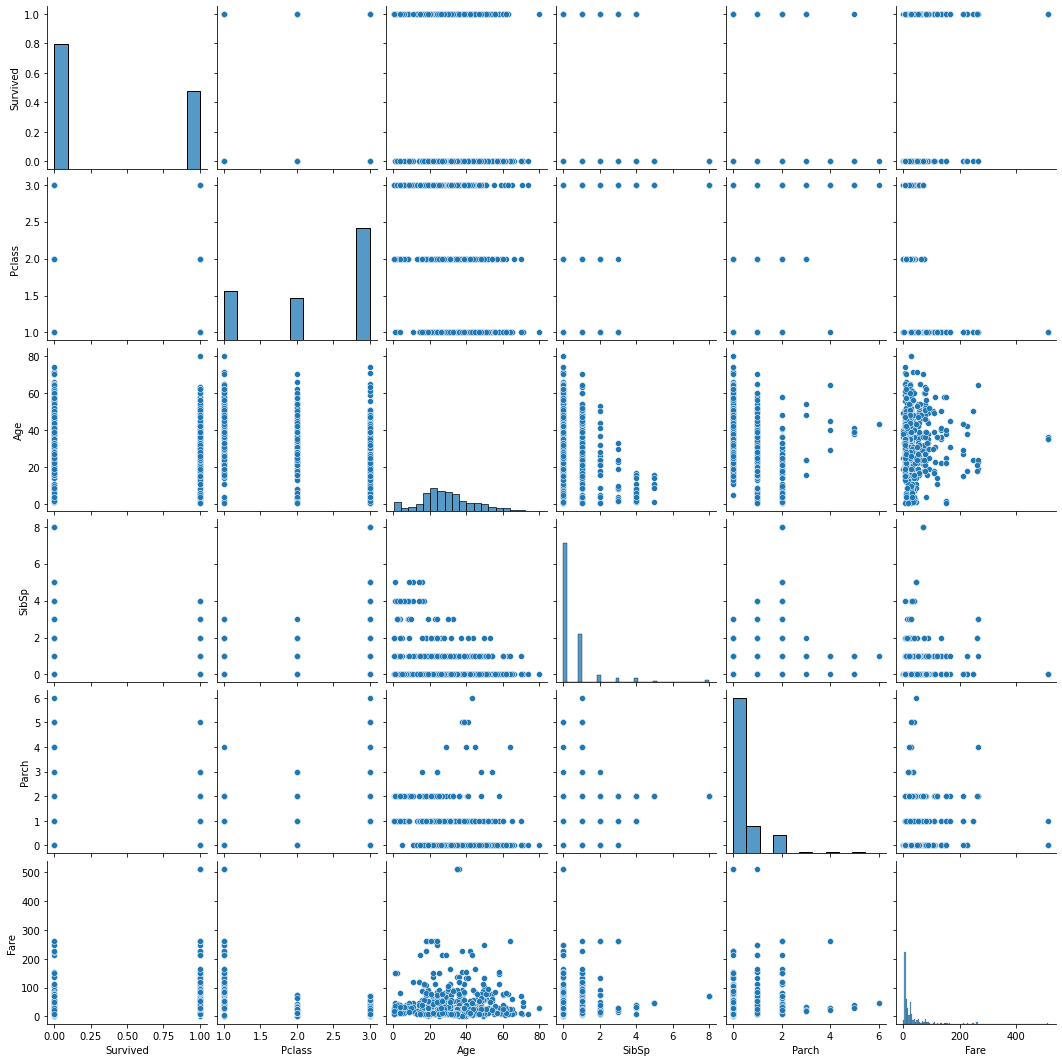

In [13]:
# Draw Pariplot

sns.pairplot(df_train)

## Insights from Pariplot 
역시 봐도 뭔소리인지 모르겠군


In [14]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Sex와 Survival(0 = die / 1=survived) 
t = pd.crosstab(df_train['Sex'], df_train['Survived'], normalize='index').round(4)*100
t



Survived,0,1
Sex,,
female,25.80,74.20
male,81.11,18.89


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survived by Sex')

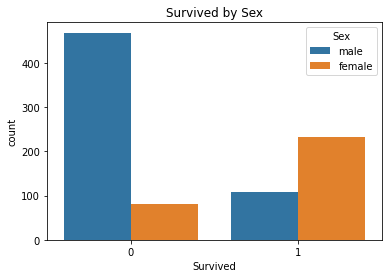

In [16]:
# Visualization
sns.countplot('Survived', data=df_train, hue='Sex')
plt.title('Survived by Sex')


In [17]:
t_pclass_survived = pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True, normalize='index')
t_pclass_survived


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363
All,0.616162,0.383838


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


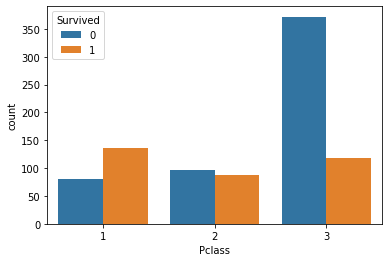

In [18]:
sns.countplot('Pclass', hue='Survived', data=df_train)
plt.show()


In [19]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)
# 확실히 1등석일수록 생존확률이 좀 더 높다. 가치 있는 feature이군..

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [20]:
# Age와 Survived

t_age_survived = pd.crosstab(df_train['Survived'], df_train['Age'],normalize='index').round(4)*100
t_age_survived

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,0.00,0.00,0.00,0.00,0.00,0.47,1.65,0.24,0.71,0.00,...,0.47,0.00,0.47,0.71,0.24,0.47,0.24,0.47,0.24,0.00
1,0.34,0.34,0.69,0.69,0.34,1.72,1.03,1.72,2.41,1.38,...,0.69,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.34


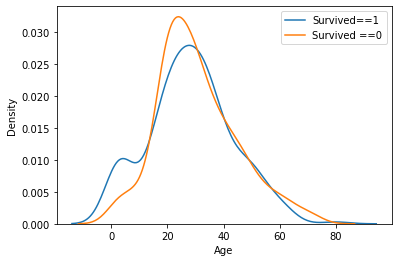

In [21]:
#kdeplo이 표현하기 좋다.
sns.kdeplot(df_train[df_train['Survived']==1]['Age'])
sns.kdeplot(df_train[df_train['Survived']==0]['Age'])
plt.legend(['Survived==1', 'Survived ==0'])
plt.show()

# 나이가 젊은 사람들이 생존을 더 많이 한 경향이 있다. 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


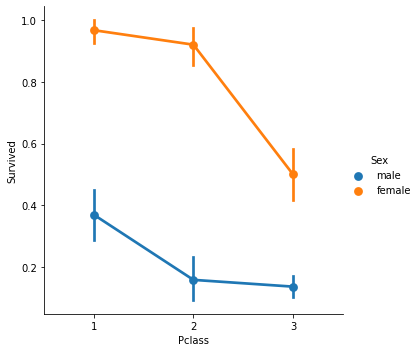

In [22]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=df_train)

In [23]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# 아래 뭔가 이상하다. 여기서부터 하자 20220410

In [24]:
t_sibsp_survived = df_train[['SibSp','Sex', 'Survived']].groupby(['Survived','Sex']).count()
t_sibsp_survived

# pd.crosstab(df_train['Parch'],df_train['Survived'])

# pd.pivot_table(df_train, index=['Survived','SibSp','Sex'])

# 형제자매 있는 여자들이 더 많이 생존했구나. 그리고 결혼한 사람들이 있으면 여자들이 생존했음. 남자가 희생

SibSp
Survived Sex          
0        female     81
         male      468
1        female    233
         male      109

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


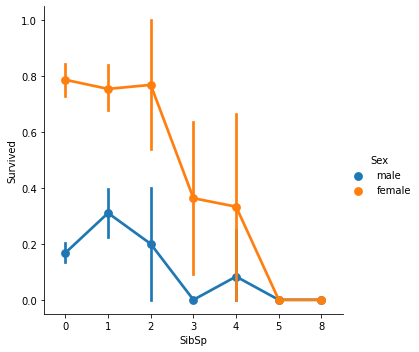

In [25]:
sns.factorplot(x='SibSp', y='Survived', hue='Sex', data=df_train)

In [26]:
# Parch and Survived

t_parch_survived = df_train[['Parch','Sex', 'Survived']].groupby(['Survived','Sex']).count()
t_parch_survived

Parch
Survived Sex          
0        female     81
         male      468
1        female    233
         male      109

이제까지 정리
: 여성의 생존률이 더 높다. -> 인코딩 필요
: Class 별로 생존률이 다르다. 1등석이 가장 높다 -> 활용 ㅇㅋ
: 어릴수록 / 여성일수록 생존률이 높다. -> 나이는 변수가 너무 많으니 그룹화 해야함. (5살단위로 끊고, 인코딩)
: Parch는 
해야할 것:
: sib / children 분석
: 아마 female with mean of children whose parents are survived -> feature engineering
: Age 결측치 : 177명이나 비는데.. 이건 pclass를 뽑고, 각 class별 나이 평균을 넣어주자. 
: fare에서 outliner 제거해줘야함
: Parch는 남자는 2 vs 2+로 그룹화 , 여자는 3 vs 3+그룹화 하자.
: Embarked # 결측치가 없으면 그대로 쓰면 되겠다. 



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


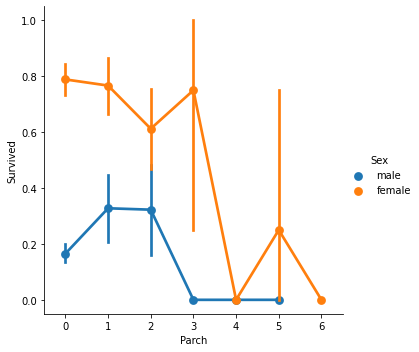

In [27]:
sns.factorplot(x='Parch', y='Survived', hue='Sex', data=df_train)

#Parch는 남자는 2 vs 2+로 그룹화 , 여자는 3 vs 3+그룹화 하자.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


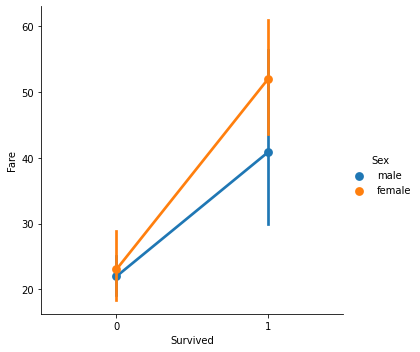

In [28]:
#Fare and Survived
low_fare = df_train[df_train['Fare']<80]
died = low_fare[low_fare['Survived'] == 0]
survived = low_fare[low_fare['Survived'] == 1]

sns.factorplot(x='Survived', y='Fare', hue='Sex', data=df_train)


# 운임이 낮은 class를 탑승한 승객들이 많이 죽었다. 물론 절대수가 많은 이유도 있겠지만. 

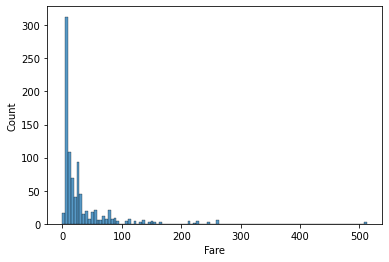

In [29]:
sns.histplot(df_train['Fare'])

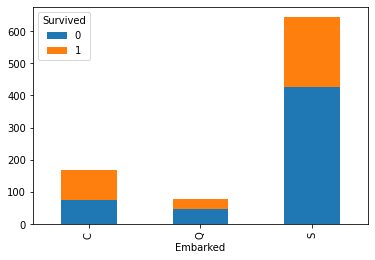

In [30]:
#embark vs survival

# df_train.groupby(['Embarked','Survived']).count()
pd.crosstab(df_train['Embarked'], df_train['Survived']).plot(kind='bar', stacked=True)

# 결측치가 없으면 그대로 쓰면 되겠다. 

# Feature Engineering
1. Outliner 제거 :  Fare등(done)
2. 결측지 핸들링 (done)
- Age 결측치 : 177명이나 비는데.. 이건 pclass를 뽑고, 각 class별 나이 평균을 넣어주자. 
3. 인코딩 : Sex, Age group화
4. 데이터 ㅁ
3. Things to do
인코딩 : Sex,이제까지 정리
4. 여성의 생존률이 더 높다. -> 인코딩 필요
5. Class 별로 생존률이 다르다. 1등석이 가장 높다 -> 활용 ㅇㅋ
6. 어릴수록 / 여성일수록 생존률이 높다. -> 나이는 변수가 너무 많으니 그룹화 해야함. (5살단위로 끊고, 인코딩)
7. Parch는 
해야할 것:
8. sib / children 분석
: 아마 female with mean of children whose parents are survived -> feature engineering
: 
: fare에서 outliner 제거해줘야함
: Parch는 남자는 2 vs 2+로 그룹화 , 여자는 3 vs 3+그룹화 하자.
: Embarked # 결측치가 없으면 그대로 쓰면 되겠다. (done)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


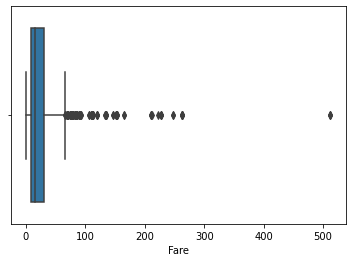

In [31]:
from pandas.core.algorithms import quantile
#Outlier detection
sns.boxplot(df_train['Fare'],data=df_train)






In [32]:
df_test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [33]:
# Train Outlier 제거
Q1 = df_train['Fare'].quantile(0.25)
Q3 = df_train['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df_train['Fare']=np.where(df_train['Fare']>upper_whisker,upper_whisker,np.where(df_train['Fare']<lower_whisker,lower_whisker,df_train['Fare']))

# Test Outlier 제거

Q1 = df_test['Fare'].quantile(0.25)
Q3 = df_test['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df_test['Fare']=np.where(df_test['Fare']>upper_whisker,upper_whisker,np.where(df_test['Fare']<lower_whisker,lower_whisker,df_test['Fare']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


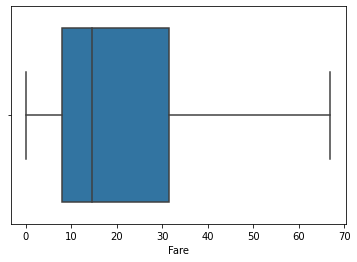

In [34]:
# sns.boxplot(df_train['Fare'], data=df_train)
sns.boxplot(df_test['Fare'], data=df_test)

In [35]:
df_train['Fare'].describe()

count    891.000000
mean      24.046813
std       20.481625
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.634400
Name: Fare, dtype: float64

In [36]:
#결측치 핸들링. AGE..
#1. Cabin : 날리기
#2. Age : Class별 평균나이로 집어 넣기
#3. Embarked : 걍 알아서 아무거나 넣기

df_train.drop(columns=['Cabin'], inplace=True)
df_test.drop(columns=['Cabin'], inplace=True)

In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 29.4+ KB


In [38]:
#Pclass별 성별 나이 평균을 구하고 이를 결측값이 자동으로 집어넣는 함수.

df_train['Age']=df_train.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
df_test['Age']=df_test.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [39]:
df_train['Age'].value_counts()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 101.9+ KB


In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 29.4+ KB


In [41]:
#Embark 결측값은 가장 많이 나온것 넣어보자
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [43]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# Feature Engineering
2. 어릴수록 / 여성일수록 생존률이 높다. -> 나이는 변수가 너무 많으니 그룹화 해야함. (5살단위로 끊고, 인코딩) (done)
3. Parch는 그룹화 한 나이에 M+F 붙여서 Sex_Parch0 1 2 3 4 5 6 7 8같이 컬럼을 신규로 만들고 Sex, Parch Drop 하자.   혹은 family size를 구하자. Parch+Sibling이 FAMILY SIZE이니. (done-> family size로)
해야할 것:

# Modeling
1. 인코딩 : Sex, Age group화

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 101.9+ KB


In [45]:
 df_train['Age'] = df_train['Age'].astype(int)

In [46]:
df_train.loc[df_train['Age'] <=11,'Age'] = 0
df_train.loc[(df_train['Age'] > 11) & (df_train['Age'] <= 18), 'Age'] = 1
df_train.loc[(df_train['Age'] > 18) & (df_train['Age'] <= 22), 'Age'] = 2
df_train.loc[(df_train['Age'] > 22) & (df_train['Age'] <= 27), 'Age'] = 3
df_train.loc[(df_train['Age'] > 27) & (df_train['Age'] <= 33), 'Age'] = 4
df_train.loc[(df_train['Age'] > 33) & (df_train['Age'] <= 40), 'Age'] = 5
df_train.loc[(df_train['Age'] > 40) & (df_train['Age'] <= 66), 'Age'] = 6
df_train.loc[ df_train['Age'] > 66, 'Age'] = 6

df_train['Age'].value_counts()


3    200
6    169
4    137
2    134
5    112
1     71
0     68
Name: Age, dtype: int64

In [47]:
df_test['Age'] = df_test['Age'].astype(int)
df_test.loc[df_test['Age'] <=11,'Age'] = 0
df_test.loc[(df_test['Age'] > 11) & (df_test['Age'] <= 18), 'Age'] = 1
df_test.loc[(df_test['Age'] > 18) & (df_test['Age'] <= 22), 'Age'] = 2
df_test.loc[(df_test['Age'] > 22) & (df_test['Age'] <= 27), 'Age'] = 3
df_test.loc[(df_test['Age'] > 27) & (df_test['Age'] <= 33), 'Age'] = 4
df_test.loc[(df_test['Age'] > 33) & (df_test['Age'] <= 40), 'Age'] = 5
df_test.loc[(df_test['Age'] > 40) & (df_test['Age'] <= 66), 'Age'] = 6
df_test.loc[ df_test['Age'] > 66, 'Age'] = 6

df_test['Age'].value_counts()


3    137
6     78
4     57
2     46
5     43
1     34
0     23
Name: Age, dtype: int64

In [48]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,
892,3,male,5,0,0,330911,7.8292,Q
893,3,female,6,1,0,363272,7.0000,S
894,2,male,6,0,0,240276,9.6875,Q
895,3,male,3,0,0,315154,8.6625,S
896,3,female,2,1,1,3101298,12.2875,S


In [49]:
#Family size 만들기

df_train['Family'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

df_test['Family'] = df_test['SibSp'] + df_test['Parch']
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
PassengerId,,,,,,,,,
892,3,male,5,0,0,330911,7.8292,Q,0
893,3,female,6,1,0,363272,7.0000,S,1
894,2,male,6,0,0,240276,9.6875,Q,0
895,3,male,3,0,0,315154,8.6625,S,0
896,3,female,2,1,1,3101298,12.2875,S,2


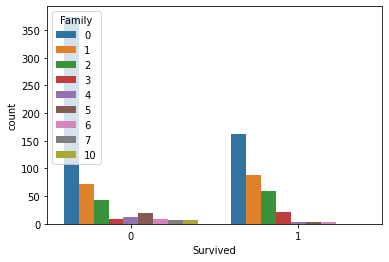

In [50]:
sns.countplot(x='Survived', data=df_train, hue='Family')

In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
 9   Family    891 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 108.9+ KB


#할거 
1.sex, embarked 인코딩
2. sibsp, parch, ticket, fare drop시키기
3. test, train data 와꾸 일치시키기
4. 모델링

In [52]:
df_test.info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    int64  
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
 8   Family    418 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 32.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-

In [53]:
#Sex 인코딩

df_train['Sex'].replace({'male': 1, 'female':0}, inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
PassengerId,,,,,,,,,,
1,0,3,1,2,1,0,A/5 21171,7.2500,S,1
2,1,1,0,5,1,0,PC 17599,65.6344,C,1
3,1,3,0,3,0,0,STON/O2. 3101282,7.9250,S,0
4,1,1,0,5,1,0,113803,53.1000,S,1
5,0,3,1,5,0,0,373450,8.0500,S,0


In [54]:
df_test['Sex'].replace({'male': 1, 'female':0}, inplace=True)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
PassengerId,,,,,,,,,
892,3,1,5,0,0,330911,7.8292,Q,0
893,3,0,6,1,0,363272,7.0000,S,1
894,2,1,6,0,0,240276,9.6875,Q,0
895,3,1,3,0,0,315154,8.6625,S,0
896,3,0,2,1,1,3101298,12.2875,S,2


In [55]:
#Embarked 인코딩
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
 9   Family    891 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 108.9+ KB


In [56]:
df_train['Embarked'].replace({'S':1, 'C':2, 'Q':3}, inplace=True)

In [57]:
df_test['Embarked'].replace({'S':1, 'C':2, 'Q':3}, inplace=True)

In [58]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
PassengerId,,,,,,,,,
892,3,1,5,0,0,330911,7.8292,3,0
893,3,0,6,1,0,363272,7.0000,1,1
894,2,1,6,0,0,240276,9.6875,3,0
895,3,1,3,0,0,315154,8.6625,1,0
896,3,0,2,1,1,3101298,12.2875,1,2


In [59]:
#drop ticket

df_train.drop(columns='Ticket', inplace=True)

In [60]:
#passenger id drop
df_train.reset_index(drop=True, inplace=True)
df_train.drop


<bound method DataFrame.drop of      Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked  Family
0           0       3    1    2      1      0   7.2500         1       1
1           1       1    0    5      1      0  65.6344         2       1
2           1       3    0    3      0      0   7.9250         1       0
3           1       1    0    5      1      0  53.1000         1       1
4           0       3    1    5      0      0   8.0500         1       0
..        ...     ...  ...  ...    ...    ...      ...       ...     ...
886         0       2    1    3      0      0  13.0000         1       0
887         1       1    0    2      0      0  30.0000         1       0
888         0       3    0    2      1      2  23.4500         1       3
889         1       1    1    3      0      0  30.0000         2       0
890         0       3    1    4      0      0   7.7500         3       0

[891 rows x 9 columns]>

In [61]:
df_test.drop(columns='Ticket', inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Family    891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 62.8 KB


# **Test 데이터도 똑같이 맞추자. train이랑** done



In [63]:
#Train, Test 데이터 분리
X = df_train.drop(['Survived'], axis=1)
y= df_train['Survived']

# Modeling! 평가지표 : accuracy 일단 RF만 써보자

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Family    891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2, shuffle=True, random_state=0)
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_valid)
accuracy = round(rf.score(X_valid, y_valid) * 100, 2)
print("Accuracy : ", accuracy, "%")



Accuracy :  83.24 %


In [70]:
# K-FOLD로 도전해보자
from sklearn.model_selection import KFold
kf=KFold(n_splits=5, shuffle=True, random_state=0)
test_preds = []
for num, (train_idx, valid_idx) in enumerate(kf.split(df_train.index)):
  print(f' == Fold {num} ===')
  X_train = X.iloc[train_idx]; y_train=y.iloc[train_idx]
  X_valid = X.iloc[valid_idx]; y_valid = y.iloc[valid_idx]

  rf.fit(X_train, y_train)
  pred = rf.predict(X_valid)
  test_preds.append(pred)

  accuracy = round(rf.score(X_valid, y_valid) * 100, 2)

  print('WtValidation Score:', accuracy)
  



 == Fold 0 ===
WtValidation Score: 82.12
 == Fold 1 ===
WtValidation Score: 77.53
 == Fold 2 ===
WtValidation Score: 82.02
 == Fold 3 ===
WtValidation Score: 80.9
 == Fold 4 ===
WtValidation Score: 78.09


# 현 상황 문제점
x y test, x y valid 등을 정확히 어디에 어떻게 적용하는지 너무 헷갈린다. 

이걸 명확하게 하고 넘어가야한다.



In [66]:
submission = pd.DataFrame
